# EfficinetNet

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fantacher/neu-metal-surface-defects-data")

print("Path to dataset files:", path)

100%|██████████| 57.4M/57.4M [00:01<00:00, 30.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fantacher/neu-metal-surface-defects-data/versions/1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train_dir = "/content/drive/MyDrive/train"
test_dir = "/content/drive/MyDrive/test"
valid_dir = "/content/drive/MyDrive/valid"

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(260, 260),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(260, 260),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(260, 260),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [ ]:
for image_batch , labels_batch in train_generator :
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 260, 260, 3)
(32, 6)


In [ ]:
class_names = train_generator.class_indices
class_names = list(class_names.keys())
print(class_names)

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


In [ ]:
#making functions
def get_sample_image(generator):
    images, labels = next(generator)
    image = images[0]
    label_index = np.argmax(labels[0])
    label_name = class_names[label_index]

    return image, label_name


def sample_images(generator, nrows=3, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

    for i in range(nrows*ncols):
        image, label_name = get_sample_image(generator)
        row = i // ncols
        col = i % ncols
        ax = axes[row][col]
        ax.imshow(image)
        ax.set_title(label_name)
        ax.axis('off')

    plt.show()

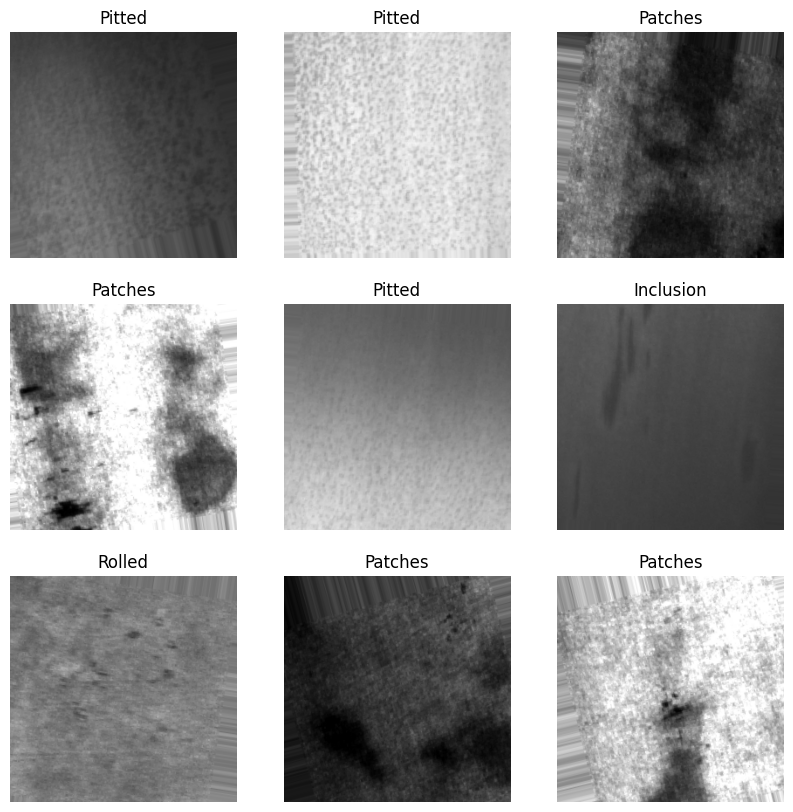

In [ ]:
sample_images(train_generator, nrows=3, ncols=3)

In [ ]:
image_batch

array([[[[0.36583203, 0.36583203, 0.36583203],
         [0.3411096 , 0.3411096 , 0.3411096 ],
         [0.3211813 , 0.3211813 , 0.3211813 ],
         ...,
         [0.23979668, 0.23979668, 0.23979668],
         [0.24522845, 0.24522845, 0.24522845],
         [0.24405767, 0.24405767, 0.24405767]],

        [[0.35677907, 0.35677907, 0.35677907],
         [0.35016254, 0.35016254, 0.35016254],
         [0.32480246, 0.32480246, 0.32480246],
         ...,
         [0.2340324 , 0.2340324 , 0.2340324 ],
         [0.22950594, 0.22950594, 0.22950594],
         [0.22646238, 0.22646238, 0.22646238]],

        [[0.34772614, 0.34772614, 0.34772614],
         [0.3592155 , 0.3592155 , 0.3592155 ],
         [0.32842365, 0.32842365, 0.32842365],
         ...,
         [0.22245227, 0.22245227, 0.22245227],
         [0.22064169, 0.22064169, 0.22064169],
         [0.22349168, 0.22349168, 0.22349168]],

        ...,

        [[0.27677995, 0.27677995, 0.27677995],
         [0.27587464, 0.27587464, 0.27587464]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from keras.layers import Dense

In [ ]:
base_model = EfficientNetB3(include_top = False , weights = 'imagenet' ,
                                                               input_shape = (260,260,3), pooling= 'max')

efficientnet_model = Sequential()
efficientnet_model.add(base_model)
efficientnet_model.add(Dense(units = 256, activation='relu'))
efficientnet_model.add(Dense(units = 6, activation = 'relu'))
# new_model.add(Dense(units = 1, activation='sigmoid'))
efficientnet_model.summary()



# model2 = Sequential([ Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (2, 2), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (2, 2), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.2),
#     Dense(6 ,activation='softmax')])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 dense_14 (Dense)            (None, 256)               393472    
                                                                 
 dense_15 (Dense)            (None, 6)                 1542      
                                                                 
Total params: 11178549 (42.64 MB)
Trainable params: 11091246 (42.31 MB)
Non-trainable params: 87303 (341.03 KB)
_________________________________________________________________


In [ ]:
efficientnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy", "F1Score", "precision", "recall"])

In [ ]:
efficient_history = efficientnet_model.fit(train_generator,
                    epochs=20,
                    batch_size=32,
                    validation_data=valid_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 773s 12s/step - F1Score: 0.1424 - accuracy: 0.2198 - loss: 8.6452 - precision: 0.1710 - recall: 0.4878 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 11.0893 - val_precision: 0.1667 - val_recall: 0.3333
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 40s 774ms/step - F1Score: 0.3377 - accuracy: 0.4703 - loss: nan - precision: 0.4579 - recall: 0.4749 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 13.4317 - val_precision: 0.1667 - val_recall: 0.1667
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 794ms/step - F1Score: 0.3280 - accuracy: 0.4319 - loss: nan - precision: 0.5158 - recall: 0.4255 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 13.4317 - val_precision: 0.1667 - val_recall: 0.1667
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 43s 821ms/step - F1Score: 0.3331 - accuracy: 0.4418 - loss: nan - precision: 0.5267 - recall: 0.4379 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 13.4317 - val_precision: 0.1667 - val_recall: 0.1667
Ep

# Sequential

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [ ]:
sequential_model = Sequential([ Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(6 ,activation='softmax')])

In [ ]:
sequential_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy", "F1Score", "precision", "recall"])

In [ ]:
sequential_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)      

In [ ]:
sequential_history = sequential_model.fit(train_generator,
                    epochs=20,
                    batch_size=32,
                    validation_data=valid_generator)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 34s 527ms/step - F1Score: 0.1967 - accuracy: 0.2238 - loss: 2.4182 - precision: 0.2417 - recall: 0.0358 - val_F1Score: 0.3837 - val_accuracy: 0.4444 - val_loss: 1.2195 - val_precision: 0.8000 - val_recall: 0.2222
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 411ms/step - F1Score: 0.5546 - accuracy: 0.5642 - loss: 1.1949 - precision: 0.7850 - recall: 0.2679 - val_F1Score: 0.5849 - val_accuracy: 0.6111 - val_loss: 0.9995 - val_precision: 0.6190 - val_recall: 0.3611
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 447ms/step - F1Score: 0.7462 - accuracy: 0.7455 - loss: 0.7093 - precision: 0.8124 - recall: 0.6315 - val_F1Score: 0.8163 - val_accuracy: 0.8194 - val_loss: 0.4340 - val_precision: 0.8806 - val_recall: 0.8194
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 444ms/step - F1Score: 0.7947 - accuracy: 0.7958 - loss: 0.5698 - precision: 0.8418 - recall: 0.7349 - val_F1Score: 0.8297 - val_accuracy: 0.8333 - val_loss: 0.5522 - val_precision: 0.8438 - val_recall: 0.7

# ResNet

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.applications.resnet import ResNet50
from keras.layers import Dense

In [ ]:
base_model = ResNet50(include_top = False , weights = 'imagenet' ,
                                                               input_shape = (200,200,3), pooling= 'max')

resnet_model = Sequential()
resnet_model.add(base_model)
resnet_model.add(Dense(units = 256, activation='relu'))
resnet_model.add(Dense(units = 6, activation = 'relu'))
# new_model.add(Dense(units = 1, activation='sigmoid'))
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dense_3 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 24113798 (91.99 MB)
Trainable params: 24060678 (91.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy", "F1Score", "precision", "recall"])

In [ ]:
resnet_history = resnet_model.fit(train_generator,
                    epochs=20,
                    batch_size=32,
                    validation_data=valid_generator)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - F1Score: 0.3781 - accuracy: 0.4269 - loss: 4.1765 - precision: 0.1851 - recall: 0.7982 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 11.2481 - val_precision: 0.1667 - val_recall: 0.3333
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 27s 511ms/step - F1Score: 0.6610 - accuracy: 0.7002 - loss: 3.3713 - precision: 0.4982 - recall: 0.7986 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 4.4333 - val_precision: 0.1667 - val_recall: 0.8333
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 27s 510ms/step - F1Score: 0.6693 - accuracy: 0.6977 - loss: 1.0943 - precision: 0.3854 - recall: 0.9475 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 6.5139 - val_precision: 0.1667 - val_recall: 0.6667
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 27s 515ms/step - F1Score: 0.8540 - accuracy: 0.8550 - loss: 1.1440 - precision: 0.5922 - recall: 0.9356 - val_F1Score: 0.0476 - val_accuracy: 0.1667 - val_loss: 10.9898 - val_precision: 0.1667 - val_recall: 0.3

# VGGNet

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [ ]:
from tf_keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

base_model = VGG16(include_top = False , weights = 'imagenet', input_shape = (200,200,3), pooling= 'max')

vgg_model = Sequential()
vgg_model.add(base_model)
vgg_model.add(Dense(units = 128, activation='relu'))
vgg_model.add(Dense(units = 6, activation = 'relu'))

vgg_model.build(input_shape=(None, 200, 200, 3))

vgg_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_6 (ModuleWr  (None, 512)               14714688  
 apper)                                                          
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dense_11 (Dense)            (None, 6)                 774       
                                                                 
Total params: 14781126 (56.39 MB)
Trainable params: 14781126 (56.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
vgg_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
vgg_history = vgg_model.fit(train_generator,
                    epochs=10,
                    batch_size=32,
                    validation_data=valid_generator)

Epoch 1/10
52/52 [==============================] - 1814s 35s/step - loss: nan - accuracy: 0.1667 - val_loss: nan - val_accuracy: 0.1667
Epoch 2/10
43/52 [=======================>......] - ETA: 5:06 - loss: nan - accuracy: 0.1672

KeyboardInterrupt: 

# SWIN

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms as T # for simplifying the transforms
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, sampler, random_split
from torchvision import models

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
import timm
from timm.loss import LabelSmoothingCrossEntropy

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import sys
from tqdm import tqdm
import time
import copy

In [ ]:
def get_classes(data_dir):
    all_data = datasets.ImageFolder(data_dir)
    return all_data.classes

In [ ]:
train_dir = "/content/drive/MyDrive/"
test_dir = "/content/drive/MyDrive/"
valid_dir = "/content/drive/MyDrive/"

In [ ]:
def get_data_loaders(data_dir, batch_size, train = False, val = False):
    if train:
        #train
        transform = T.Compose([
            T.RandomHorizontalFlip(),
            T.RandomVerticalFlip(),
            T.RandomApply(torch.nn.ModuleList([T.ColorJitter()]), p=0.25),
            T.Resize(256),
            T.CenterCrop(224),
            T.ToTensor(),
            T.Normalize(timm.data.IMAGENET_DEFAULT_MEAN, timm.data.IMAGENET_DEFAULT_STD), # imagenet means
            T.RandomErasing(p=0.1, value='random')
        ])
        train_data = datasets.ImageFolder(os.path.join(data_dir, "train/"), transform = transform)
        train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
        return train_loader, len(train_data)
    elif val:
        # val/test
        transform = T.Compose([ # We dont need augmentation for test transforms
            T.Resize(256),
            T.CenterCrop(224),
            T.ToTensor(),
            T.Normalize(timm.data.IMAGENET_DEFAULT_MEAN, timm.data.IMAGENET_DEFAULT_STD), # imagenet means
        ])
        val_data = datasets.ImageFolder(os.path.join(data_dir, "valid/"), transform=transform)
        # test_data = datasets.ImageFolder(os.path.join(data_dir, "test/"), transform=transform)
        val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True, num_workers=4)
        # test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=4)
        return val_loader, len(val_data)
    else:
        transform = T.Compose([ # We dont need augmentation for test transforms
            T.Resize(256),
            T.CenterCrop(224),
            T.ToTensor(),
            T.Normalize(timm.data.IMAGENET_DEFAULT_MEAN, timm.data.IMAGENET_DEFAULT_STD), # imagenet means
        ])
        test_data = datasets.ImageFolder(os.path.join(data_dir, "test/"), transform=transform)
        test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=4)
        return test_loader, len(test_data)

In [ ]:
(train_loader, train_data_len) = get_data_loaders(train_dir, 128, train=True)
(val_loader, valid_data_len) = get_data_loaders(valid_dir, 32, val=True)
(test_loader, test_data_len) = get_data_loaders(valid_dir, 32)

In [ ]:
dataloaders = {
    "train": train_loader,
    "val": val_loader
}
dataset_sizes = {
    "train": train_data_len,
    "val": valid_data_len
}

In [ ]:
classes = get_classes("/content/drive/MyDrive/train")
print(classes, len(classes))

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches'] 6


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
HUB_URL = "SharanSMenon/swin-transformer-hub:main"
MODEL_NAME = "swin_tiny_patch4_window7_224"
# check hubconf for more models.
model = torch.hub.load(HUB_URL, MODEL_NAME, pretrained=True) # load from torch hub

Using cache found in /root/.cache/torch/hub/SharanSMenon_swin-transformer-hub_main


In [ ]:
for param in model.parameters(): #freeze model
    param.requires_grad = False

n_inputs = model.head.in_features
model.head = nn.Sequential(
    nn.Linear(n_inputs, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, len(class_names))
)
model = model.to(device)
print(model.head)

Sequential(
  (0): Linear(in_features=768, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=512, out_features=6, bias=True)
)


In [ ]:
criterion = LabelSmoothingCrossEntropy()
criterion = criterion.to(device)
optimizer = optim.AdamW(model.head.parameters(), lr=0.001)

In [ ]:
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.97)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print("-"*10)

        for phase in ['train', 'val']: # We do training and validation phase per epoch
            if phase == 'train':
                model.train() # model to training mode
            else:
                model.eval() # model to evaluate

            running_loss = 0.0
            running_corrects = 0.0

            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'): # no autograd makes validation go faster
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1) # used for accuracy
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step() # step at end of epoch

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc =  running_corrects.double() / dataset_sizes[phase]

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict()) # keep the best validation accuracy model
        print()
    time_elapsed = time.time() - since # slight error
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print("Best Val Acc: {:.4f}".format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [ ]:
model_ft = train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=7)

Epoch 0/6
----------


100%|██████████| 13/13 [10:22<00:00, 47.88s/it]


train Loss: 0.8646 Acc: 0.8490


100%|██████████| 3/3 [00:32<00:00, 10.95s/it]


val Loss: 0.5698 Acc: 1.0000

Epoch 1/6
----------


100%|██████████| 13/13 [09:38<00:00, 44.48s/it]


train Loss: 0.5519 Acc: 0.9897


100%|██████████| 3/3 [00:22<00:00,  7.58s/it]


val Loss: 0.4970 Acc: 1.0000

Epoch 2/6
----------


100%|██████████| 13/13 [09:34<00:00, 44.21s/it]


train Loss: 0.4929 Acc: 0.9946


100%|██████████| 3/3 [00:22<00:00,  7.56s/it]


val Loss: 0.4561 Acc: 1.0000

Epoch 3/6
----------


100%|██████████| 13/13 [09:37<00:00, 44.45s/it]


train Loss: 0.4744 Acc: 0.9988


100%|██████████| 3/3 [00:21<00:00,  7.18s/it]


val Loss: 0.4607 Acc: 1.0000

Epoch 4/6
----------


100%|██████████| 13/13 [09:37<00:00, 44.42s/it]


train Loss: 0.4665 Acc: 0.9994


100%|██████████| 3/3 [00:22<00:00,  7.55s/it]


val Loss: 0.4527 Acc: 1.0000

Epoch 5/6
----------


100%|██████████| 13/13 [09:40<00:00, 44.69s/it]


train Loss: 0.4573 Acc: 0.9982


100%|██████████| 3/3 [00:24<00:00,  8.19s/it]


val Loss: 0.4452 Acc: 1.0000

Epoch 6/6
----------


100%|██████████| 13/13 [09:37<00:00, 44.43s/it]


train Loss: 0.4567 Acc: 0.9988


100%|██████████| 3/3 [00:21<00:00,  7.10s/it]


val Loss: 0.4453 Acc: 1.0000

Training complete in 70m 58s
Best Val Acc: 1.0000


In [ ]:
test_loss = 0.0
class_correct = list(0 for i in range(len(classes)))
class_total = list(0 for i in range(len(classes)))
model_ft.eval()

for data, target in tqdm(test_loader):
    data, target = data.to(device), target.to(device)
    with torch.no_grad(): # turn off autograd for faster testing
        output = model_ft(data)
        loss = criterion(output, target)
    test_loss = loss.item() * data.size(0)
    _, pred = torch.max(output, 1)
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.cpu().numpy())
    if len(target) == 32:
        for i in range(32):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

test_loss = test_loss / test_data_len
print('Test Loss: {:.4f}'.format(test_loss))
for i in range(len(classes)):
    if class_total[i] > 0:
        print("Test Accuracy of %5s: %2d%% (%2d/%2d)" % (
            classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])
        ))
    else:
        print("Test accuracy of %5s: NA" % (classes[i]))
print("Test Accuracy of %2d%% (%2d/%2d)" % (
            100*np.sum(class_correct)/np.sum(class_total), np.sum(class_correct), np.sum(class_total)
        ))

100%|██████████| 3/3 [00:31<00:00, 10.54s/it]

Test Loss: 0.0613
Test Accuracy of Crazing: 100% (11/11)
Test Accuracy of Inclusion: 100% (10/10)
Test Accuracy of Patches: 100% (12/12)
Test Accuracy of Pitted: 100% ( 9/ 9)
Test Accuracy of Rolled: 100% (12/12)
Test Accuracy of Scratches: 100% (10/10)
Test Accuracy of 100% (64/64)


In [ ]:
print(model_ft)

SwinTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
    (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (layers): ModuleList(
    (0): BasicLayer(
      dim=96, input_resolution=(56, 56), depth=2
      (blocks): ModuleList(
        (0): SwinTransformerBlock(
          dim=96, input_resolution=(56, 56), num_heads=3, window_size=7, shift_size=0, mlp_ratio=4.0
          (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (attn): WindowAttention(
            dim=96, window_size=(7, 7), num_heads=3
            (qkv): Linear(in_features=96, out_features=288, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=96, out_features=96, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
            (softmax): Softmax(dim=-1)
          )
          (drop_path): Identity()
          (norm2): LayerNo

In [ ]:
example = torch.rand(1, 3, 224, 224)
traced_script_module = torch.jit.trace(model.cpu(), example)
traced_script_module.save("butterfly_swin_transformer.pt")

In [ ]:
print(model_ft)

<bound method Module.parameters of SwinTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
    (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (layers): ModuleList(
    (0): BasicLayer(
      dim=96, input_resolution=(56, 56), depth=2
      (blocks): ModuleList(
        (0): SwinTransformerBlock(
          dim=96, input_resolution=(56, 56), num_heads=3, window_size=7, shift_size=0, mlp_ratio=4.0
          (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (attn): WindowAttention(
            dim=96, window_size=(7, 7), num_heads=3
            (qkv): Linear(in_features=96, out_features=288, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=96, out_features=96, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
            (softmax): Softmax(dim=-1)
          )
          (drop_path): Id

# ViT

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
# import tensorflow_addons as tfa
import glob, random, os, warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

print('TensorFlow Version ' + tf.__version__)

def seed_everything(seed = 0):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

seed_everything()
warnings.filterwarnings('ignore')

TensorFlow Version 2.18.0


In [22]:
image_size = 200
batch_size = 32
n_classes = 6

train_dir = "/content/drive/MyDrive/train"
test_dir = "/content/drive/MyDrive/test"
valid_dir = "/content/drive/MyDrive/valid"

# df_train = pd.read_csv('/kaggle/input/cassava-leaf-disease-classification/train.csv', dtype = 'str')

test_images = glob.glob(test_dir + '/*.jpg')
df_test = pd.DataFrame(test_images, columns = ['image_path'])

# classes = {0 : "Cassava Bacterial Blight (CBB)",
#            1 : "Cassava Brown Streak Disease (CBSD)",
#            2 : "Cassava Green Mottle (CGM)",
#            3 : "Cassava Mosaic Disease (CMD)",
#            4 : "Healthy"}

In [23]:
def data_augment(image):
    p_spatial = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_rotate = tf.random.uniform([], 0, 1.0, dtype = tf.float32)

    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)

    if p_spatial > .75:
        image = tf.image.transpose(image)

    # Rotates
    if p_rotate > .75:
        image = tf.image.rot90(image, k = 3) # rotate 270º
    elif p_rotate > .5:
        image = tf.image.rot90(image, k = 2) # rotate 180º
    elif p_rotate > .25:
        image = tf.image.rot90(image, k = 1) # rotate 90º

    return image

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_gen = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_gen = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


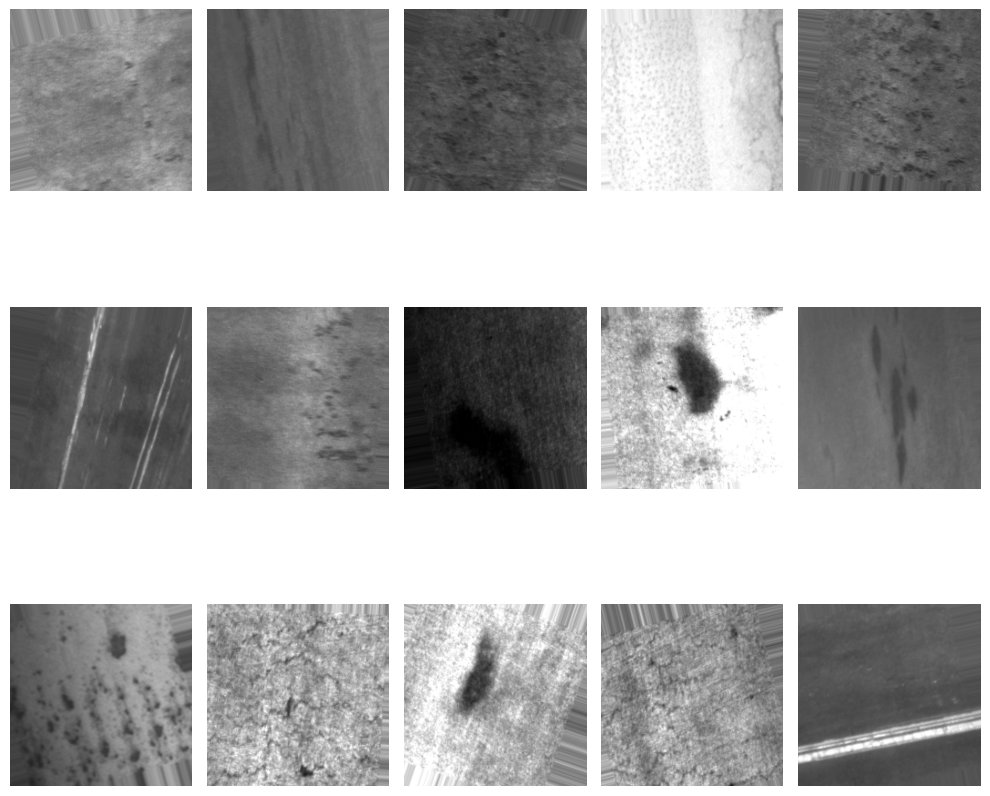

In [25]:
images = [train_gen[0][0][i] for i in range(16)]
fig, axes = plt.subplots(3, 5, figsize = (10, 10))

axes = axes.flatten()

for img, ax in zip(images, axes):
    ax.imshow(img.reshape(image_size, image_size, 3))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [26]:
learning_rate = 0.001
weight_decay = 0.0001
num_epochs = 1

patch_size = 7  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [56, 28]  # Size of the dense layers of the final classifier

In [27]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = L.Dense(units, activation = tf.nn.gelu)(x)
        x = L.Dropout(dropout_rate)(x)
    return x

In [28]:
class Patches(L.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images = images,
            sizes = [1, self.patch_size, self.patch_size, 1],
            strides = [1, self.patch_size, self.patch_size, 1],
            rates = [1, 1, 1, 1],
            padding = 'VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [ ]:
# plt.figure(figsize=(4, 4))

# x = train_gen.next()
# image = x[0][0]

# plt.imshow(image.astype('uint8'))
# plt.axis('off')

# resized_image = tf.image.resize(
#     tf.convert_to_tensor([image]), size = (image_size, image_size)
# )

# patches = Patches(patch_size)(resized_image)
# print(f'Image size: {image_size} X {image_size}')
# print(f'Patch size: {patch_size} X {patch_size}')
# print(f'Patches per image: {patches.shape[1]}')
# print(f'Elements per patch: {patches.shape[-1]}')

# n = int(np.sqrt(patches.shape[1]))
# plt.figure(figsize=(4, 4))

# for i, patch in enumerate(patches[0]):
#     ax = plt.subplot(n, n, i + 1)
#     patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
#     plt.imshow(patch_img.numpy().astype('uint8'))
#     plt.axis('off')

AttributeError: 'DirectoryIterator' object has no attribute 'next'

<Figure size 400x400 with 0 Axes>

In [29]:
class PatchEncoder(L.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = L.Dense(units = projection_dim)
        self.position_embedding = L.Embedding(
            input_dim = num_patches, output_dim = projection_dim
        )

    def call(self, patch):
        positions = tf.range(start = 0, limit = self.num_patches, delta = 1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [30]:
def vision_transformer():
    inputs = L.Input(shape = (image_size, image_size, 3))

    # Create patches.
    patches = Patches(patch_size)(inputs)

    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):

        # Layer normalization 1.
        x1 = L.LayerNormalization(epsilon = 1e-6)(encoded_patches)

        # Create a multi-head attention layer.
        attention_output = L.MultiHeadAttention(
            num_heads = num_heads, key_dim = projection_dim, dropout = 0.1
        )(x1, x1)

        # Skip connection 1.
        x2 = L.Add()([attention_output, encoded_patches])

        # Layer normalization 2.
        x3 = L.LayerNormalization(epsilon = 1e-6)(x2)

        # MLP.
        x3 = mlp(x3, hidden_units = transformer_units, dropout_rate = 0.1)

        # Skip connection 2.
        encoded_patches = L.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = L.LayerNormalization(epsilon = 1e-6)(encoded_patches)
    representation = L.Flatten()(representation)
    representation = L.Dropout(0.5)(representation)

    # Add MLP.
    features = mlp(representation, hidden_units = mlp_head_units, dropout_rate = 0.5)

    # Classify outputs.
    logits = L.Dense(n_classes)(features)

    # Create the model.
    model = tf.keras.Model(inputs = inputs, outputs = logits)

    return model

In [31]:
decay_steps = train_gen.n // train_gen.batch_size
initial_learning_rate = learning_rate

lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecay(initial_learning_rate, decay_steps)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_decayed_fn)

In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

model = vision_transformer()

model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.1),
              metrics = ['accuracy'])


STEP_SIZE_TRAIN = train_gen.n // train_gen.batch_size
STEP_SIZE_VALID = valid_gen.n // valid_gen.batch_size

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

# checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = './model.hdf5',
#                                                   monitor = 'val_accuracy',
#                                                   verbose = 1,
#                                                   save_best_only = True,
#                                                   save_weights_only = True,
#                                                   mode = 'max')

callbacks = [earlystopping, lr_scheduler]#, checkpointer]

model.fit(x = train_gen,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = valid_gen,
          validation_steps = STEP_SIZE_VALID,
          epochs = 5)

 3/51 ━━━━━━━━━━━━━━━━━━━━ 31:45 40s/step - accuracy: 0.1024 - loss: 7.6780

KeyboardInterrupt: 

# EfficientNet Plots

In [ ]:
print(efficient_history.history["F1Score"])

[<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.57528955, 0.        , 0.        , 0.        , 0.45504582,
       0.34084505], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.7659574 , 0.        , 0.        , 0.        , 0.73355263,
       0.55918366], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.78823525, 0.        , 0.        , 0.        , 0.6468401 ,
       0.5679012 ], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.78171086, 0.        , 0.        , 0.        , 0.6533575 ,
       0.56314695], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.8017751, 0.       , 0.       , 0.       , 0.6678899, 0.561151 ],
      dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.8048047 , 0.        , 0.        , 0.        , 0.64695007,
       0.572327  ], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.80838317, 0.        , 0.        , 0.        , 0.678

In [ ]:
def plot_history(history,metric):
    plt.plot(history.history[metric])
    # plt.plot(history.history["val_"+metric],"")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric])#, "val_"+metric])
    plt.grid()
    plt.show()

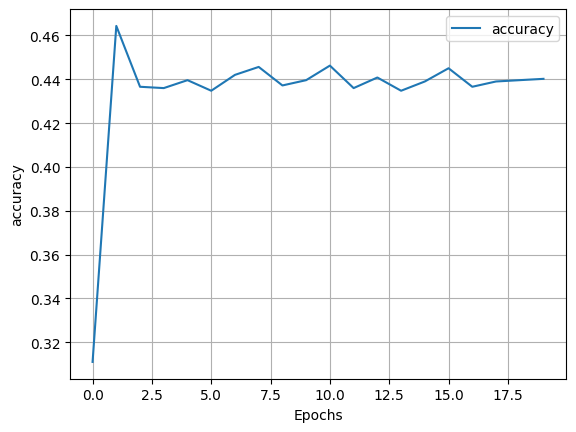

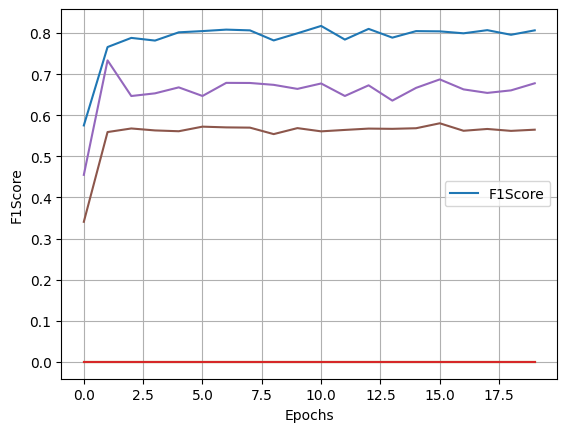

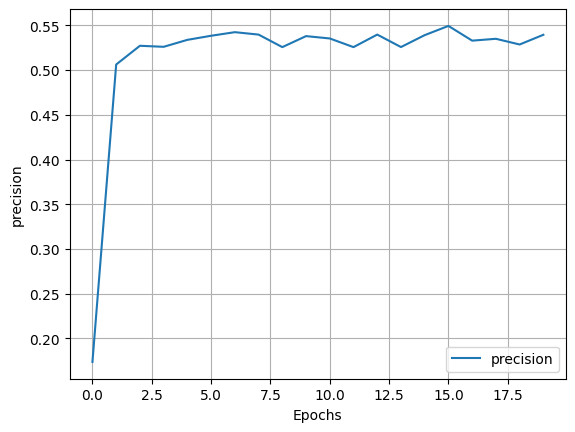

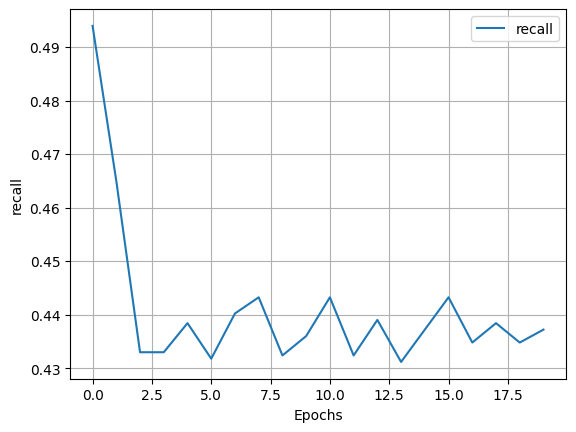

In [ ]:
plot_history(efficient_history,"accuracy")
plot_history(efficient_history,"F1Score")
plot_history(efficient_history,"precision")
plot_history(efficient_history,"recall")

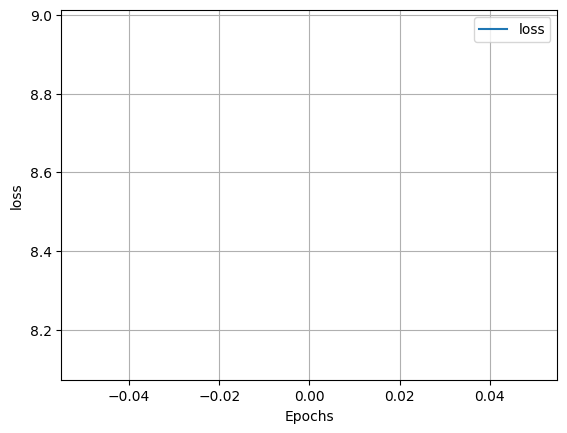

In [ ]:
plot_history(efficient_history,"loss")

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(260, 260),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(260, 260),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(260, 260),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [ ]:
result = efficientnet_model.evaluate(test_generator)
print("Test loss, Test accuracy : ", result)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - F1Score: 0.3213 - accuracy: 0.4314 - loss: nan - precision: 0.5167 - recall: 0.4314
Test loss, Test accuracy :  [nan, 0.4722222089767456, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.96      , 0.        , 0.        , 0.        , 0.8695651 ,
       0.48979583], dtype=float32)>, 0.5573770403862, 0.4722222089767456]


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


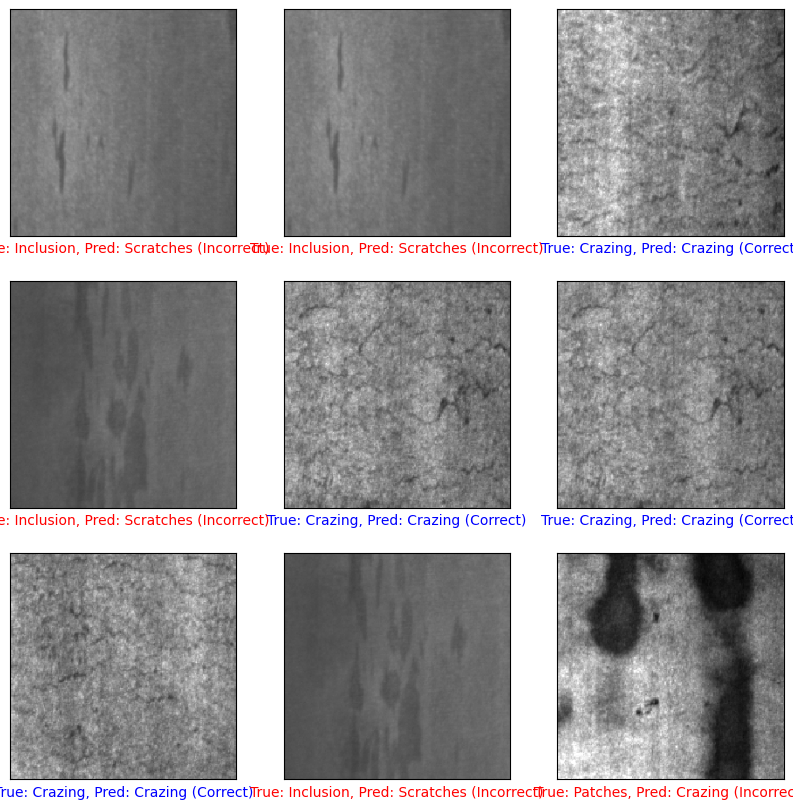

In [ ]:
images, labels = next(test_generator)

indices = np.random.choice(range(len(images)), size=9)
images = images[indices]
labels = labels[indices]

predictions = efficientnet_model.predict(images)


class_names=list(test_generator.class_indices.keys())


plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    image = images[i]

    if image.shape[-1] == 1:
        image = np.squeeze(image)

    plt.imshow(image)

    predicted_label = np.argmax(predictions[i])

    if predicted_label == np.argmax(labels[i]):
        color='blue'
        result_text="Correct"

    else:
        color='red'
        result_text="Incorrect"

    label_text="True: "+ class_names[np.argmax(labels[i])] + ", Pred: " + class_names[predicted_label] + f" ({result_text})"

    plt.xlabel(label_text,color=color)

# Sequential plots

In [ ]:
print(sequential_history.history["F1Score"])

[<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.36397743, 0.14035085, 0.3591731 , 0.4232954 , 0.1610169 ,
       0.26694041], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.7037701 , 0.60826445, 0.7155322 , 0.6401446 , 0.49173543,
       0.5259259 ], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.8447653 , 0.6928327 , 0.86642593, 0.7039105 , 0.7286245 ,
       0.65561694], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.89009005, 0.75163394, 0.88043475, 0.7437379 , 0.8500881 ,
       0.7692307 ], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.9302326 , 0.77852345, 0.9166666 , 0.7334593 , 0.87079644,
       0.7710371 ], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.92998195, 0.8130359 , 0.9233576 , 0.7897623 , 0.9184397 ,
       0.8343079 ], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.9418181 , 0.8353552 , 0.93862814, 0.8096118 

In [ ]:
def plot_history(history,metric):
    plt.plot(history.history[metric])
    # plt.plot(history.history["val_"+metric],"")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric])#, "val_"+metric])
    plt.grid()
    plt.show()

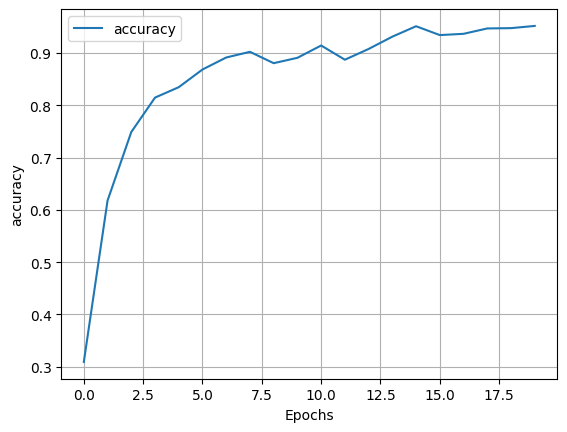

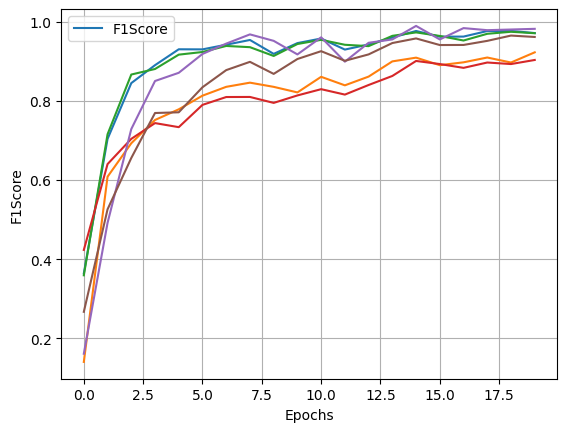

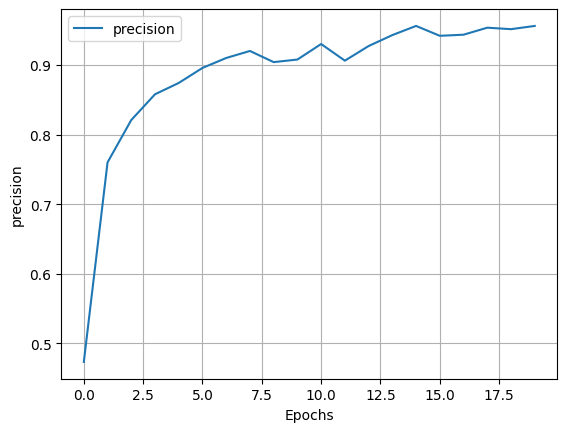

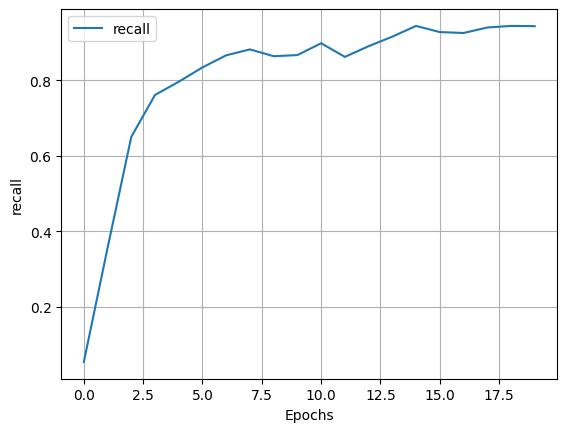

In [ ]:
plot_history(sequential_history,"accuracy")
plot_history(sequential_history,"F1Score")
plot_history(sequential_history,"precision")
plot_history(sequential_history,"recall")

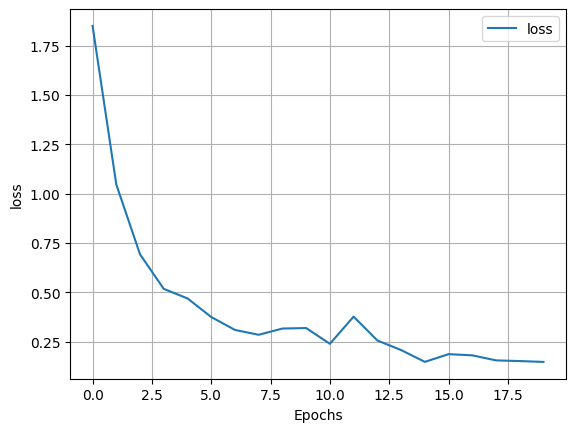

In [ ]:
plot_history(sequential_history, "loss")

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [ ]:
result = sequential_model.evaluate(test_generator)
print("Test loss, Test accuracy : ", result)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - F1Score: 0.6474 - accuracy: 0.7352 - loss: 0.6911 - precision: 0.8002 - recall: 0.7166 
Test loss, Test accuracy :  [0.7370318174362183, 0.7361111044883728, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.8571428 , 0.58823526, 0.8571428 , 0.6666666 , 0.68571424,
       0.73684204], dtype=float32)>, 0.7878788113594055, 0.7222222089767456]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


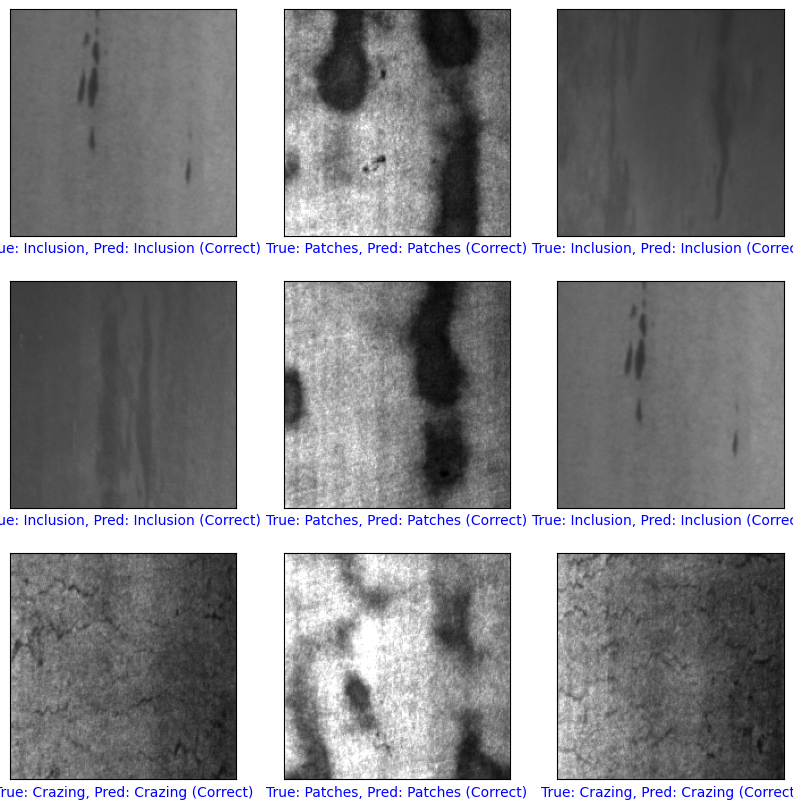

In [ ]:
images, labels = next(test_generator)

indices = np.random.choice(range(len(images)), size=9)
images = images[indices]
labels = labels[indices]

predictions = sequential_model.predict(images)


class_names=list(test_generator.class_indices.keys())


plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    image = images[i]

    if image.shape[-1] == 1:
        image = np.squeeze(image)

    plt.imshow(image)

    predicted_label = np.argmax(predictions[i])

    if predicted_label == np.argmax(labels[i]):
        color='blue'
        result_text="Correct"

    else:
        color='red'
        result_text="Incorrect"

    label_text="True: "+ class_names[np.argmax(labels[i])] + ", Pred: " + class_names[predicted_label] + f" ({result_text})"

    plt.xlabel(label_text,color=color)

# ResNet plots

In [ ]:
print(resnet_history.history["F1Score"])

[<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.02105263, 0.72936654, 0.78834355, 0.49162006, 0.78130835,
       0.6132075 ], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.37669897, 0.7122861 , 0.66932267, 0.5413793 , 0.79182154,
       0.86516845], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.6480937 , 0.805369  , 0.64570224, 0.74353874, 0.7931688 ,
       0.83491457], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.8619402 , 0.80979276, 0.8370497 , 0.7963963 , 0.86851203,
       0.83175796], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.69047606, 0.85509837, 0.5707433 , 0.7302752 , 0.84797287,
       0.83491457], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.73684204, 0.78699183, 0.5756097 , 0.66949147, 0.8211243 ,
       0.90073526], dtype=float32)>, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.9263913 , 0.8566775 , 0.9176029 , 0.85380113

In [ ]:
def plot_history(history,metric):
    plt.plot(history.history[metric])
    # plt.plot(history.history["val_"+metric],"")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric])#, "val_"+metric])
    plt.grid()
    plt.show()

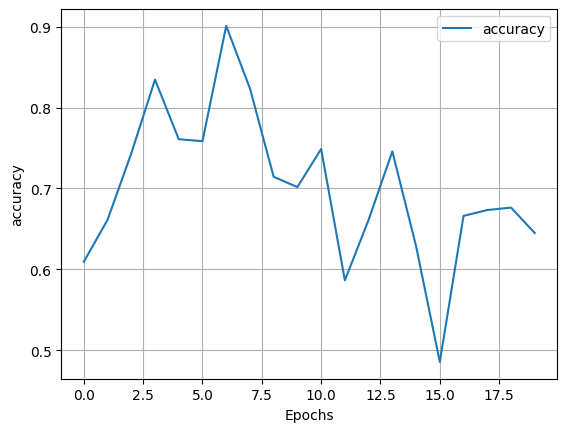

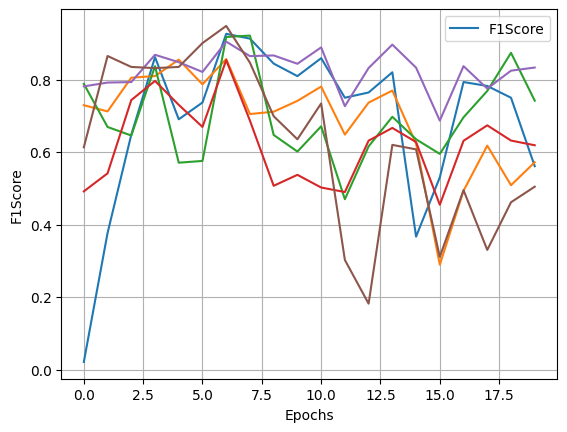

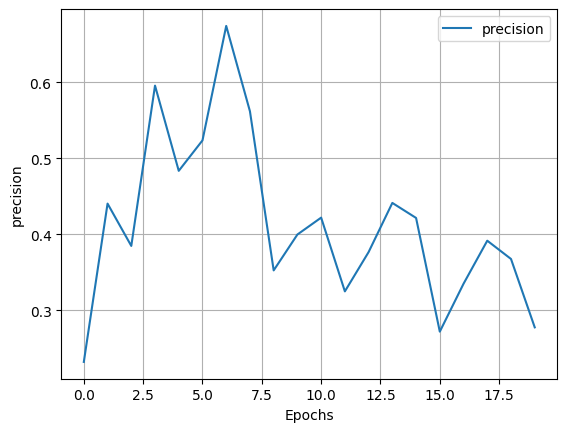

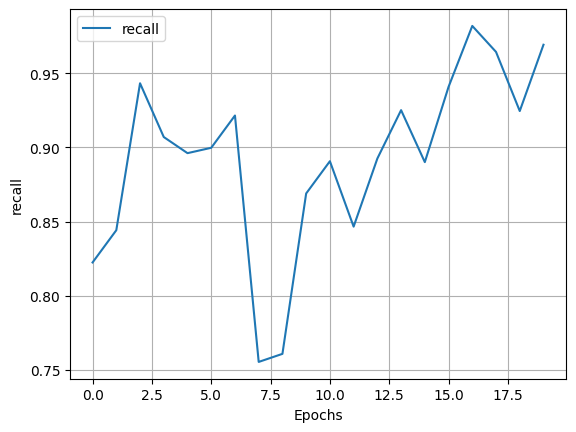

In [ ]:
plot_history(resnet_history,"accuracy")
plot_history(resnet_history,"F1Score")
plot_history(resnet_history,"precision")
plot_history(resnet_history,"recall")

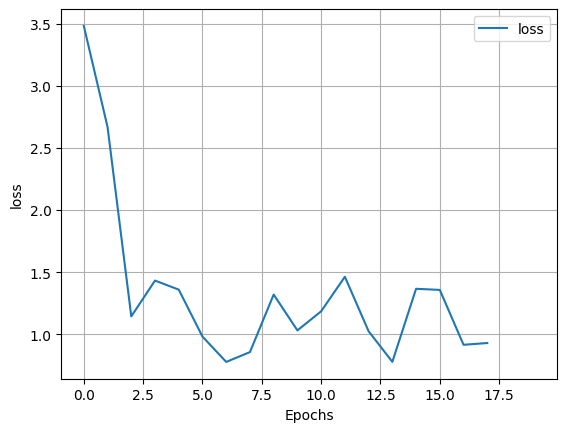

In [ ]:
plot_history(resnet_history, "loss")

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [ ]:
result = sequential_model.evaluate(test_generator)
print("Test loss, Test accuracy : ", result)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - F1Score: 0.6474 - accuracy: 0.7352 - loss: 0.6911 - precision: 0.8002 - recall: 0.7166 
Test loss, Test accuracy :  [0.7370318174362183, 0.7361111044883728, <tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.8571428 , 0.58823526, 0.8571428 , 0.6666666 , 0.68571424,
       0.73684204], dtype=float32)>, 0.7878788113594055, 0.7222222089767456]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


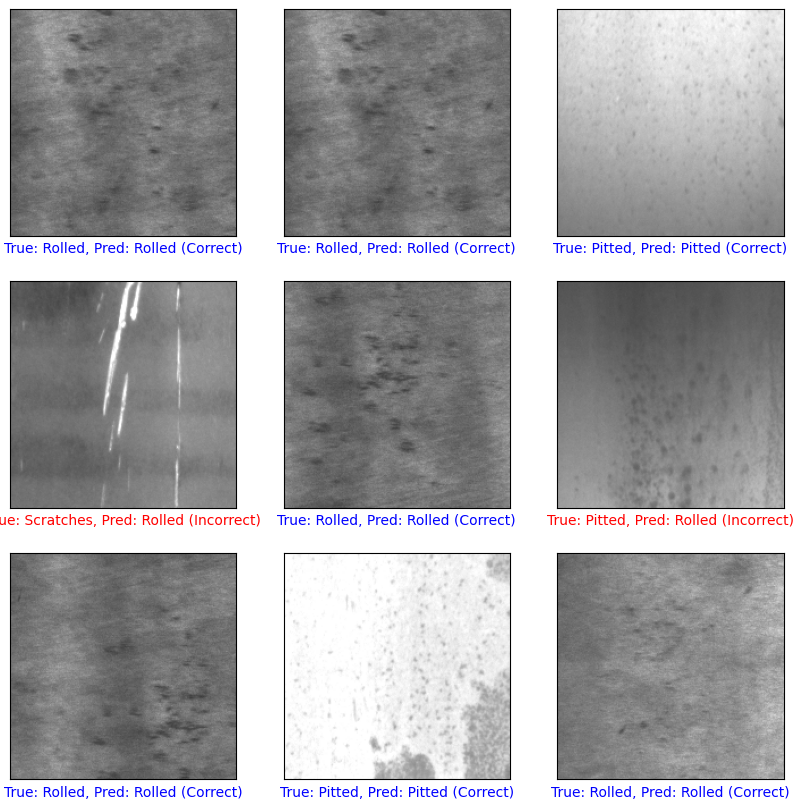

In [ ]:
images, labels = next(test_generator)

indices = np.random.choice(range(len(images)), size=9)
images = images[indices]
labels = labels[indices]

predictions = resnet_model.predict(images)


class_names=list(test_generator.class_indices.keys())


plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    image = images[i]

    if image.shape[-1] == 1:
        image = np.squeeze(image)

    plt.imshow(image)

    predicted_label = np.argmax(predictions[i])

    if predicted_label == np.argmax(labels[i]):
        color='blue'
        result_text="Correct"

    else:
        color='red'
        result_text="Incorrect"

    label_text="True: "+ class_names[np.argmax(labels[i])] + ", Pred: " + class_names[predicted_label] + f" ({result_text})"

    plt.xlabel(label_text,color=color)

# VGGNet plots

In [ ]:
def plot_history(history,metric):
    plt.plot(history.history[metric])
    # plt.plot(history.history["val_"+metric],"")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric])#, "val_"+metric])
    plt.grid()
    plt.show()

In [ ]:
plot_history(vgg_history,"accuracy")

In [ ]:
plot_history(vgg_history, "loss")

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

In [ ]:
result = vgg_model.evaluate(test_generator)
print("Test loss, Test accuracy : ", result)

In [ ]:
images, labels = next(test_generator)

indices = np.random.choice(range(len(images)), size=9)
images = images[indices]
labels = labels[indices]

predictions = vgg_model.predict(images)


class_names=list(test_generator.class_indices.keys())


plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    image = images[i]

    if image.shape[-1] == 1:
        image = np.squeeze(image)

    plt.imshow(image)

    predicted_label = np.argmax(predictions[i])

    if predicted_label == np.argmax(labels[i]):
        color='blue'
        result_text="Correct"

    else:
        color='red'
        result_text="Incorrect"

    label_text="True: "+ class_names[np.argmax(labels[i])] + ", Pred: " + class_names[predicted_label] + f" ({result_text})"

    plt.xlabel(label_text,color=color)

# SWIN plots

In [ ]:
def plot_history(metric):
    plt.plot([0.8490, 0.9897, 0.9946, 0.9988, 0.9994, 0.9982, 0.9988])
    # plt.plot(history.history["val_"+metric],"")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric])#, "val_"+metric])
    plt.grid()
    plt.show()

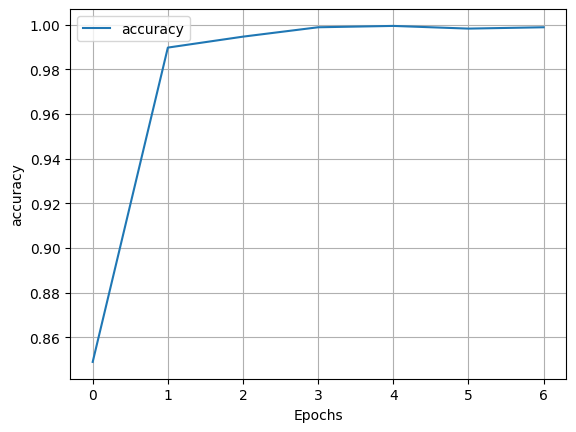

In [ ]:
plot_history("accuracy")

# ViT plots

In [ ]:
def plot_history(metric):
    plt.plot([0.8490, 0.9897, 0.9946, 0.9988, 0.9994, 0.9982, 0.9988])
    # plt.plot(history.history["val_"+metric],"")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric])#, "val_"+metric])
    plt.grid()
    plt.show()

In [ ]:
plot_history("accuracy")

# Сравнение всех моделей

In [ ]:
import pandas as pd

# Define the accuracy and loss values for both models
efficientnet_accuracy = efficient_history.history['accuracy'][-1]
efficientnet_precision = efficient_history.history['precision'][-1]
efficientnet_recall = efficient_history.history['recall'][-1]
efficientnet_loss = efficient_history.history['loss'][-1]

sequential_accuracy = sequential_history.history['accuracy'][-1]
sequential_precision = sequential_history.history['precision'][-1]
sequential_recall = sequential_history.history['recall'][-1]
sequential_loss = sequential_history.history['loss'][-1]

resnet_accuracy = resnet_history.history['accuracy'][-1]
resnet_precision = resnet_history.history['precision'][-1]
resnet_recall = resnet_history.history['recall'][-1]
resnet_loss = resnet_history.history['loss'][-1]

swin_accuracy = 0.9988

# model1_accuracy = history.history['accuracy'][-1]
# model1_loss = history.history['loss'][-1]
# model2_accuracy = history2.history['accuracy'][-1]
# model2_loss = history2.history['loss'][-1]


# Create a dictionary with the accuracy and loss values
data = {'Model': ['EfficientNetB3', 'Sequential', 'ResNet50'],
        'Accuracy': [efficientnet_accuracy, sequential_accuracy, resnet_accuracy, swin_accuracy],
        'Recall': [efficientnet_recall, sequential_recall, resnet_recall],
        'Precision': [efficientnet_precision, sequential_precision, resnet_precision],
        'Loss': [efficientnet_loss, sequential_loss, resnet_loss]}

df = pd.DataFrame(data)
df

NameError: name 'efficient_history' is not defined